# First Glance

Small code snippet to introduce you with Pyatoa. The code block below loads example waveforms and metadata, then processes and plots the waveforms alongside a source-receiver map.

[2022-12-14 11:26:51] - pyatoa - WARNING: no ASDFDataSet, cannot save windows
[2022-12-14 11:26:51] - pyatoa - WARNING: no ASDFDataSet, cannot save adjoint sources
/opt/miniconda3/envs/pyatoa-docs/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/pyatoa-docs/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/miniconda3/envs/pyatoa-docs/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


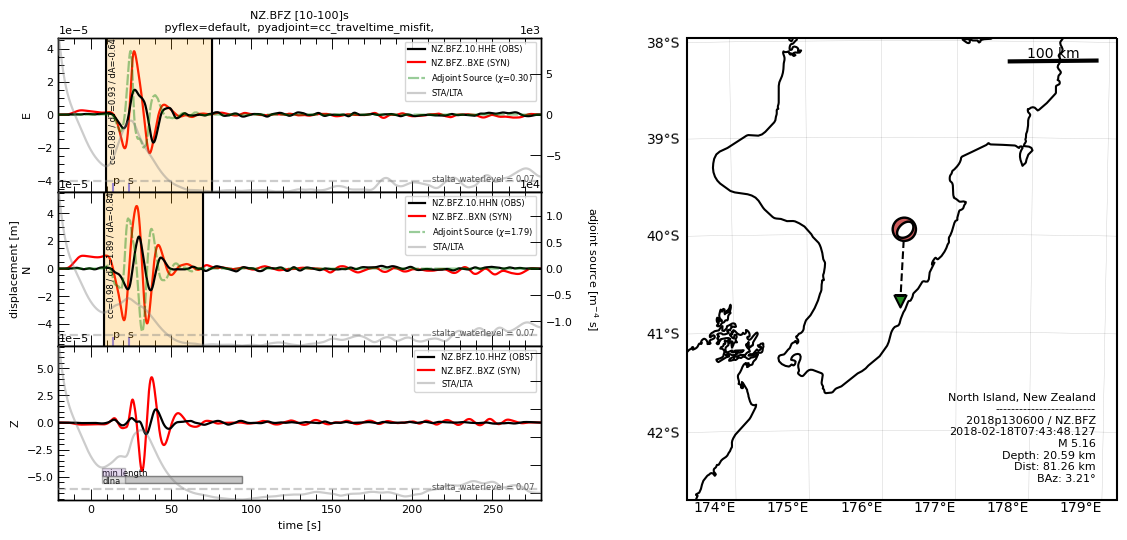

In [3]:
from pyatoa import Manager

mgmt = Manager()
mgmt.load()
mgmt.flow()
mgmt.plot()

You can see the underlying information of the Manager class by printing it. Important relative to a given source-receiver pair is displayed, as well as the status of the processing workflow.

In [2]:
print(mgmt)

Manager Data
    dataset   [ds]:        None
    quakeml   [event]:     smi:nz.org.geonet/2018p130600
    station   [inv]:       NZ.BFZ
    observed  [st_obs]:    3
    synthetic [st_syn]:    3
Stats & Status
    half_dur:              0.6989458964552759
    time_offset_sec:       -20.0
    standardized:          True
    obs_processed:         True
    syn_processed:         True
    nwin   [windows]:      2
    misfit [adjsrcs]:      2.09016925696681



Data, metadata, gathered misfit windows and output adjoint sources are all accesible as attributes of the Manager. We can access the observed waveforms through the `st_obs` attribute:

In [6]:
mgmt.st_obs  # the observed waveforms

3 Trace(s) in Stream:
NZ.BFZ.10.HHE | 2018-02-18T07:43:28.127644Z - 2018-02-18T07:48:28.097644Z | 33.3 Hz, 10000 samples
NZ.BFZ.10.HHN | 2018-02-18T07:43:28.127644Z - 2018-02-18T07:48:28.097644Z | 33.3 Hz, 10000 samples
NZ.BFZ.10.HHZ | 2018-02-18T07:43:28.127644Z - 2018-02-18T07:48:28.097644Z | 33.3 Hz, 10000 samples

Or grab the adjoint source data array through the `adjsrcs` attribute:

In [11]:
mgmt.adjsrcs["E"].adjoint_source  # the East component adjoint source

array([0., 0., 0., ..., 0., 0., 0.])

The underlying Config class controls the processing workflow and resulting outputs. The current set options are default values.

In [12]:
mgmt.config

CONFIG
    iteration:               None
    step_count:              None
    event_id:                None
GATHER
    start_pad:               20
    end_pad:                 500
    save_to_ds:              True
PROCESS
    min_period:              10
    max_period:              100
    filter_corners:          2
    unit_output:             DISP
    rotate_to_rtz:           False
    win_amp_ratio:           0.0
    synthetics_only:         False
LABELS
    component_list:          ['E', 'N', 'Z']
    observed_tag:            observed
    synthetic_tag:           synthetic
    paths:                   {'waveforms': [], 'synthetics': [], 'responses': [], 'events': []}
EXTERNAL
    pyflex_preset:           default
    adj_src_type:            cc_traveltime_misfit
    pyflex_config:           <pyflex.config.Config object at 0x167312850>
    pyadjoint_config:        <pyadjoint.config.Config object at 0x1655a2610>